# **Estrutura a Termo das Taxas de Juros - ETTJ**
* Igor Wilm Senna Pinto

* A Estrutura a Termo das Taxas de Juros (ETTJ) é o gráfico que contêm as taxas de mercado dos títulos públicos com prazos de vencimento diferentes

In [ ]:
!pip install investpy # API do investing.com
!pip install plotly # Biblioteca para plotar gráficos interativos

## Importando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import investpy as inv
from plotly import graph_objects as go
import plotly.express as px

## Parâmetros

In [3]:
data_inicio = '01/01/2010'

hoje_dt = dt.datetime.today() - dt.timedelta(hours= 3)
hoje = hoje_dt.strftime('%d/%m/%Y')

def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)['valor']
    index = pd.read_json(url)['data']
    df.index = pd.to_datetime( index , dayfirst=True )
    return df
selic = pd.DataFrame(consulta_bc(432))

## Títulos públicos do Brasil

In [4]:
bonds_BR = inv.get_bonds_list(country = 'brazil')
bonds_BR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [5]:
bonds_overview = inv.get_bonds_overview(country = 'brazil')
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,12.342,11.763,11.763,11.667,+0.579,+4.92%
1,brazil,Brazil 6M,12.969,12.420,12.969,12.969,+0.000,+0.00%
2,brazil,Brazil 9M,13.167,12.730,12.795,12.730,+0.438,+3.44%
3,brazil,Brazil 1Y,13.164,12.970,12.995,12.995,+0.194,+1.50%
4,brazil,Brazil 2Y,12.050,12.645,12.705,12.645,-0.595,-4.71%
5,brazil,Brazil 3Y,12.270,12.143,12.320,12.240,+0.127,+1.05%
6,brazil,Brazil 5Y,12.151,12.125,12.190,12.125,+0.026,+0.21%
7,brazil,Brazil 8Y,12.106,12.130,12.160,12.130,-0.024,-0.20%
8,brazil,Brazil 10Y,12.087,12.135,12.135,12.135,-0.048,-0.39%


## Estrutura a Termo das Taxas de Juros - ETTJ

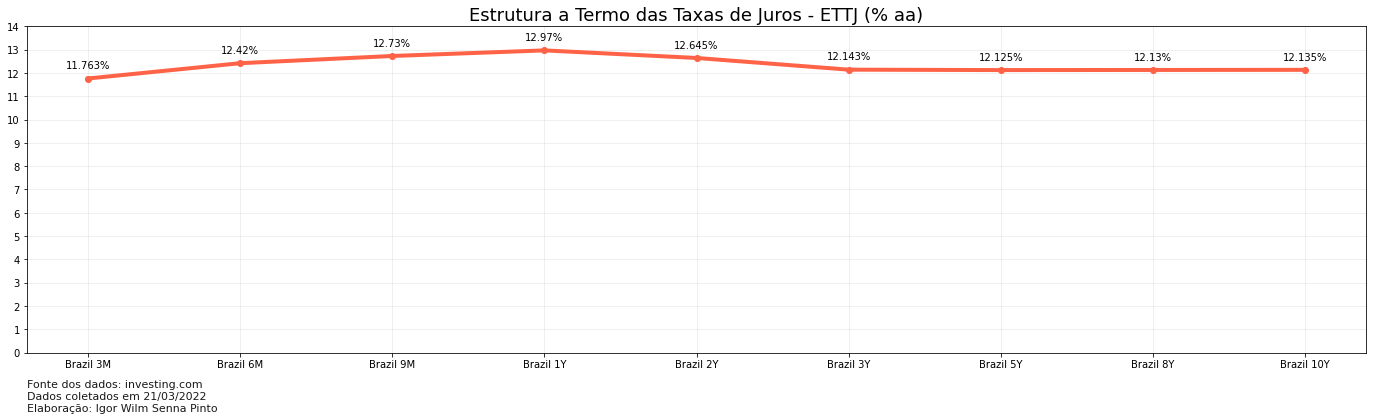

In [6]:
plt.figure(figsize = (24 , 6))
plt.title('Estrutura a Termo das Taxas de Juros - ETTJ (% aa)' , fontsize = 18 )
plt.plot(bonds_BR , bonds_overview['last_close'] , color = 'tomato' , linewidth = 4 , marker = 'o')
plt.grid(alpha = 0.25)
plt.yticks(range(0,15)) 

for i in range(len(bonds_BR)):
  label = str(bonds_overview['last_close'][i]) + '%'
  plt.annotate(label , (bonds_BR[i] , bonds_overview['last_close'][i]) , textcoords = "offset points", xytext = (0,10), ha = "center")

plt.text(-0.4, -1.5, 'Fonte dos dados: investing.com', ha='left', fontsize = 11, alpha=0.9)
plt.text(-0.4, -2, 'Dados coletados em {}'.format(hoje), ha='left', fontsize = 11, alpha=0.9)
plt.text(-0.4, -2.5, 'Elaboração: Igor Wilm Senna Pinto', ha='left', fontsize = 11, alpha=0.9)

plt.show()

## Valor de fechamento dos títulos públicos VS a taxa Selic

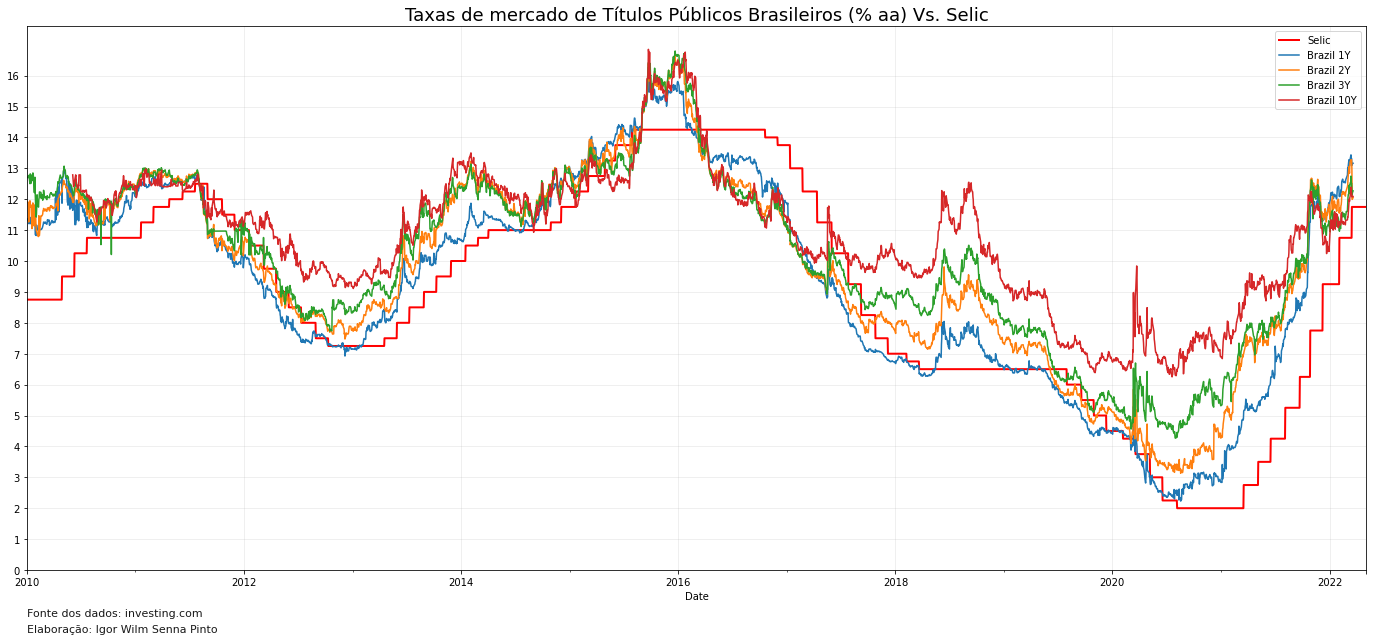

In [7]:
plt.figure(figsize = (24,10))

selic_data_inicio = selic.loc[selic.index >= data_inicio]['valor']
selic_data_inicio.plot(label = 'Selic' , color = 'red' , linewidth = 2)

um_ano = inv.get_bond_historical_data('Brazil 1Y' , from_date = data_inicio , to_date = hoje)
um_ano['Close'].plot(label = 'Brazil 1Y')

dois_anos = inv.get_bond_historical_data('Brazil 2Y' , from_date = data_inicio , to_date = hoje)
dois_anos['Close'].plot(label = 'Brazil 2Y')

tres_anos = inv.get_bond_historical_data('Brazil 3Y' , from_date = data_inicio , to_date = hoje)
tres_anos['Close'].plot(label = 'Brazil 3Y')

dez_anos = inv.get_bond_historical_data('Brazil 10Y' , from_date = data_inicio , to_date = hoje)
dez_anos['Close'].plot(label = 'Brazil 10Y')

plt.grid(alpha = 0.25)
plt.yticks(range(0,17))
plt.title('Taxas de mercado de Títulos Públicos Brasileiros (% aa) Vs. Selic' , fontsize = 18)
plt.text('2010', -1.5, 'Fonte dos dados: investing.com', ha='left', fontsize = 11, alpha=0.9)
plt.text('2010', -2, 'Elaboração: Igor Wilm Senna Pinto', ha='left', fontsize = 11, alpha=0.9)
plt.legend()
plt.show()

In [8]:
bonds = pd.DataFrame()

for prazo_de_vencimento in bonds_BR:
  bonds[prazo_de_vencimento] = inv.get_bond_historical_data( prazo_de_vencimento , from_date = data_inicio , to_date = hoje )['Close']

bonds.index = pd.to_datetime(bonds.index)
#bonds

## Gráfico interativo

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = bonds_BR , y=bonds.loc[hoje] , mode = 'lines' ))
fig.update_yaxes(range=[0,15])
fig.update_layout(title = 'Estrutura a Temo das Taxas de Juros - ETTJ - {}'.format(hoje))
fig.show()